In [1]:
!pip install dmba
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Airfares.csv')

In [3]:
df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB


In [5]:
df['VACATION'] = [1 if v == 'Yes' else 0 for v in df['VACATION']]

In [6]:
df['SW'] = [1 if v == 'Yes' else 0 for v in df['SW']]

In [7]:
df['SLOT'] = [1 if v == 'Free' else 0 for v in df['SLOT']]

In [8]:
df['GATE'] = [1 if v == 'Free' else 0 for v in df['GATE']]

In [9]:
df.corr()

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
COUPON,1.000000,0.020223,0.071424,-0.188098,-0.347252,-0.088403,0.046889,-0.107763,0.094970,-0.021901,0.064369,0.746805,-0.336974,0.496537
NEW,0.020223,1.000000,-0.047433,-0.081881,0.054147,0.026597,0.113377,-0.016672,0.058568,-0.058414,-0.013106,0.080965,0.010495,0.091730
VACATION,0.071424,-0.047433,1.000000,0.025488,-0.151625,-0.216393,-0.076288,-0.208549,-0.167054,0.129514,0.116838,0.093198,-0.017747,-0.276868
SW,-0.188098,-0.081881,0.025488,1.000000,-0.040172,-0.272269,-0.281160,-0.089282,-0.221272,0.251593,0.255782,-0.240485,-0.052468,-0.543813
HI,-0.347252,0.054147,-0.151625,-0.040172,1.000000,-0.027382,0.082393,-0.172495,-0.062456,0.185179,-0.155182,-0.312375,-0.168961,0.025195
S_INCOME,-0.088403,0.026597,-0.216393,-0.272269,-0.027382,1.000000,-0.138864,0.517187,-0.272280,-0.231868,-0.108193,0.028153,0.138197,0.209135
E_INCOME,0.046889,0.113377,-0.076288,-0.281160,0.082393,-0.138864,1.000000,-0.144059,0.458418,-0.197481,-0.062807,0.176531,0.259961,0.326092
S_POP,-0.107763,-0.016672,-0.208549,-0.089282,-0.172495,0.517187,-0.144059,1.000000,-0.280143,-0.281576,-0.085900,0.018437,0.284611,0.145097
E_POP,0.094970,0.058568,-0.167054,-0.221272,-0.062456,-0.272280,0.458418,-0.280143,1.000000,-0.246216,-0.149666,0.115640,0.314698,0.285043
SLOT,-0.021901,-0.058414,0.129514,0.251593,0.185179,-0.231868,-0.197481,-0.281576,-0.246216,1.000000,-0.143628,-0.009483,-0.243143,-0.209438


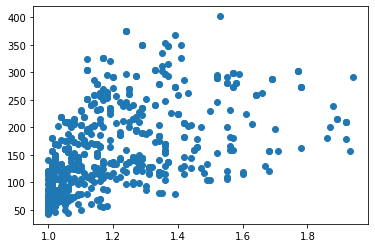

In [10]:
plt.scatter(df['COUPON'], df['FARE'])
plt.show()

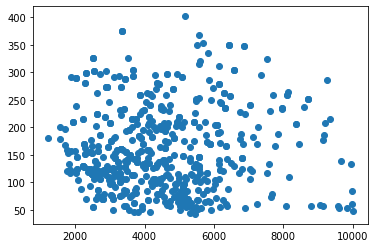

In [11]:
plt.scatter(df['HI'], df['FARE'])
plt.show()

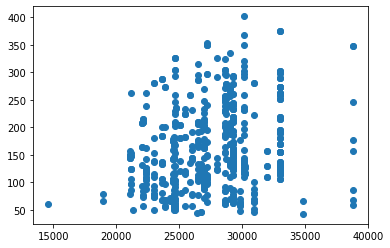

In [12]:
plt.scatter(df['S_INCOME'], df['FARE'])
plt.show()

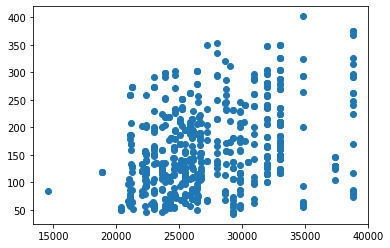

In [13]:
plt.scatter(df['E_INCOME'], df['FARE'])
plt.show()

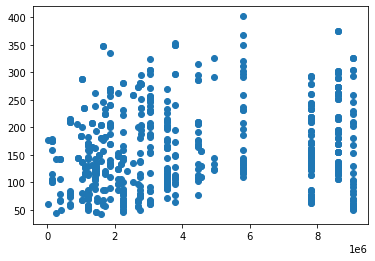

In [14]:
plt.scatter(df['S_POP'], df['FARE'])
plt.show()

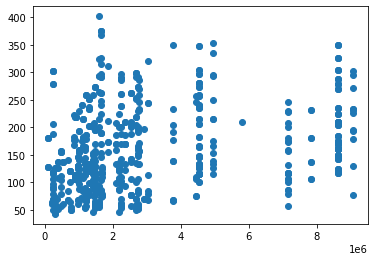

In [15]:
plt.scatter(df['E_POP'], df['FARE'])
plt.show()

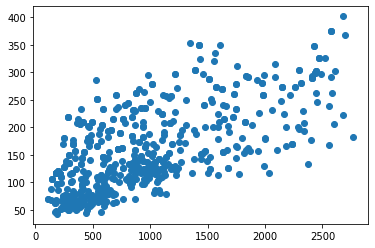

In [16]:
plt.scatter(df['DISTANCE'], df['FARE'])
plt.show()

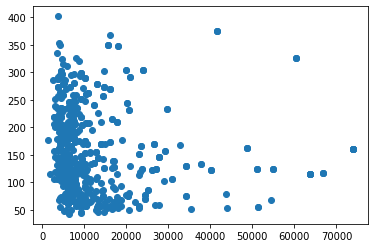

In [17]:
plt.scatter(df['PAX'], df['FARE'])
plt.show()

In [18]:
# Q1 The best predictor of FARE seems to be distance, which isn't very surprising. The farther the distance, the higher the fuel used, and therefore the higher the fare should be.

In [19]:
predictors = ['COUPON','NEW','VACATION','SW','HI','S_INCOME','E_INCOME','S_POP','E_POP','SLOT','GATE','DISTANCE','PAX']
outcome = 'FARE'

In [20]:
# partition data
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)


In [21]:
fare_lrm = LinearRegression()
fare_lrm.fit(X_train, y_train)

LinearRegression()

In [22]:
# evaluate the model
regressionSummary(y_valid, fare_lrm.predict(X_valid))


Regression statistics

                      Mean Error (ME) : -1.8231
       Root Mean Squared Error (RMSE) : 36.0002
            Mean Absolute Error (MAE) : 28.5002
          Mean Percentage Error (MPE) : -6.6037
Mean Absolute Percentage Error (MAPE) : 21.6048


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
# partition data
trainData, validData = train_test_split(df, test_size = 0.4, random_state = 1)

In [26]:
# standardize the data
scaler.fit(trainData[['COUPON','NEW','HI','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX']])

StandardScaler()

In [27]:
fareNorm = pd.concat([pd.DataFrame(scaler.transform(df[['COUPON','NEW','HI','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX']]),
                                  columns = ['zCOUPON','zNEW','zHI','zS_INCOME','zE_INCOME','zS_POP','zE_POP','zDISTANCE','zPAX']),
                     df[['FARE']]], axis = 1)

In [28]:
trainNorm = fareNorm.iloc[trainData.index]
validNorm = fareNorm.iloc[validData.index]

In [29]:
train_X = trainNorm[['zCOUPON','zNEW','zHI','zS_INCOME','zE_INCOME','zS_POP','zE_POP','zDISTANCE','zPAX']]
train_Y = trainNorm[['FARE']]
valid_X = validNorm[['zCOUPON','zNEW','zHI','zS_INCOME','zE_INCOME','zS_POP','zE_POP','zDISTANCE','zPAX']]
valid_Y = validNorm[['FARE']]

In [30]:
fare_lrm_standard = LinearRegression()
fare_lrm_standard.fit(train_X, train_Y)

LinearRegression()

In [31]:
# evaluate the model
regressionSummary(valid_Y, fare_lrm_standard.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -1.0048
       Root Mean Squared Error (RMSE) : 42.8813
            Mean Absolute Error (MAE) : 34.5181
          Mean Percentage Error (MPE) : -10.4026
Mean Absolute Percentage Error (MAPE) : 26.7294


In [32]:
# Q2 Surprisingly enough, the model that used standardized data performed slightly worse than when it was used on unprocessed data

In [33]:
predict = {'COUPON':[1.202], 'NEW':[3], 'VACATION':[0],'SW':[0],'HI':[4442.141],'S_INCOME':[28760],'E_INCOME':[27664],'S_POP':[4557004],'E_POP':[3195503],'SLOT':[1],'GATE':[1],'DISTANCE':[1976],'PAX':[12782]}

In [34]:
predict_df = pd.DataFrame(predict)

In [35]:
predict_df

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX
0,1.202,3,0,0,4442.141,28760,27664,4557004,3195503,1,1,1976,12782


In [36]:
X = pd.get_dummies(predict_df[predictors])

In [37]:
fare_lrm.predict(X)

array([253.6962435])

In [38]:
# Q3: The model predicts the fare to be roughly 254 dollars.

In [39]:
# Q4: S_CODE, E_CODE, HI, E_INCOME, E_POP, GATE, S_CITY, E_CITY, S_INCOME, S_POP, SLOT, and DISTANCE are all variables that can be known in the real world.
# In the situation of a new airport (as in the question given), since it is a new route, COUPON, VACATION, PAX, NEW, and SW variables might not be available in a real-world situation.